In [7]:
import sys
sys.path.append(r'C:\Users\Pedro\Dropbox\repository\projects\finances.git')

%matplotlib inline

In [8]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime

import pyfolio as pf


from crypto_analysis.crypto_data import get_quandl_data

In [14]:
def cal_returns(array):
    return array[-1]/array[0]

btc_usd = get_quandl_data('BCHARTS/KRAKENUSD')

btc_returns = btc_usd.dropna().rolling(window=2).apply(cal_returns)['Close']

out_of_sample = btc_returns.index[-40]

Loaded BCHARTS/KRAKENUSD from cache


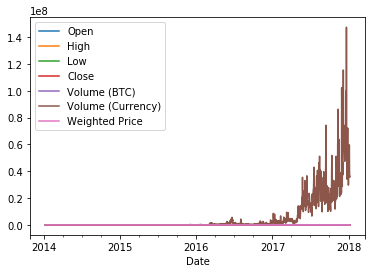

In [15]:
btc_usd.plot()

Entire data start date: 2014-01-09
Entire data end date: 2018-01-07
In-sample months: 65
Out-of-sample months: 1


,All,In-sample,Out-of-sample
Annual return,inf%,inf%,4.27187955966e+78%
Cumulative returns,inf%,inf%,1.45743876738e+14%
Annual volatility,nan%,nan%,113.2%
Sharpe ratio,NaN,NaN,226.11
Calmar ratio,NaN,NaN,NaN
Stability,NaN,NaN,1.00
Max drawdown,0.0%,0.0%,0.0%
Omega ratio,NaN,NaN,NaN
Sortino ratio,inf,inf,inf
Skew,NaN,NaN,0.39


C:\Anaconda3\envs\finance\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2014-01-09,2014-01-09,2014-01-09,1
1,0.00,2014-01-09,2014-01-09,2014-01-09,1
2,0.00,2014-01-09,2014-01-09,2014-01-09,1
3,0.00,2014-01-09,2014-01-09,2014-01-09,1
4,0.00,2014-01-09,2014-01-09,2014-01-09,1


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

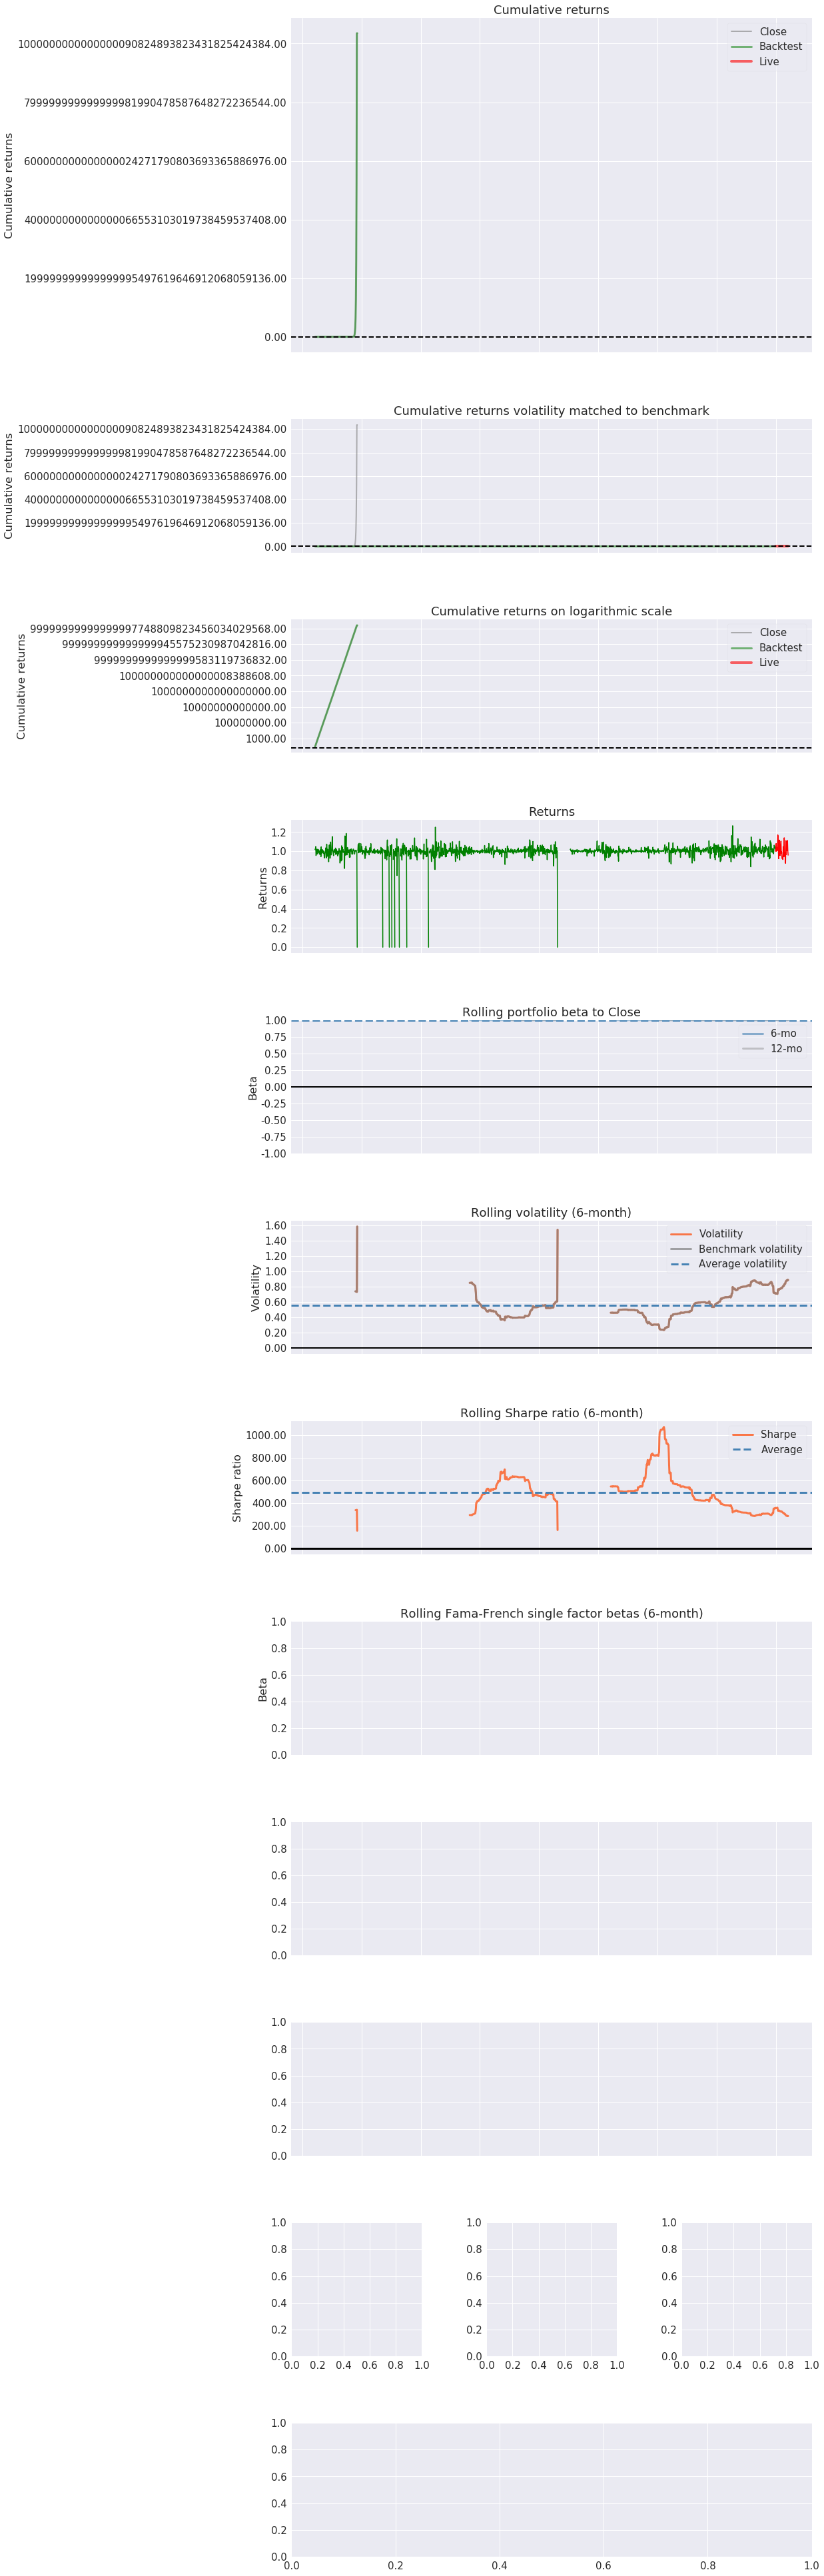

In [11]:
pf.create_returns_tear_sheet(
    returns=btc_returns,
    benchmark_rets=btc_returns,
    live_start_date=out_of_sample
)